In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#count of jobs in table :mean how much demand this job
#scatter plot:used for represent variables


In [ ]:
#how to access specfic row 
df['job_country'].iloc[1]

'France'

In [4]:

df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [5]:
df_explode=df.explode('job_skills')
df_explode #index will reapeat after explode method

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [6]:
skill_status=df_explode.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

In [55]:
skill_status

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [56]:
skill_status=skill_status.sort_values(by='skill_count',ascending=False).head(10)
skill_status

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


In [32]:
skill_status.index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap'],
      dtype='object', name='job_skills')

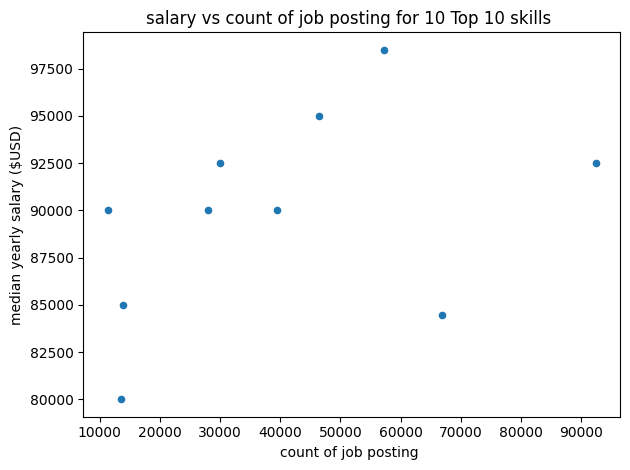

In [27]:
skill_status.plot(kind='scatter',x='skill_count',y='median_salary')
#this plot tell us how much paid every skill and how skill much demand for data analyst

plt.title('salary vs count of job posting for 10 Top 10 skills ') #now i know why use head(top) instead of head(10)
plt.xlabel('count of job posting ')
plt.ylabel('median yearly salary ($USD)')
plt.tight_layout()

plt.show()

## what the names of all this skills 

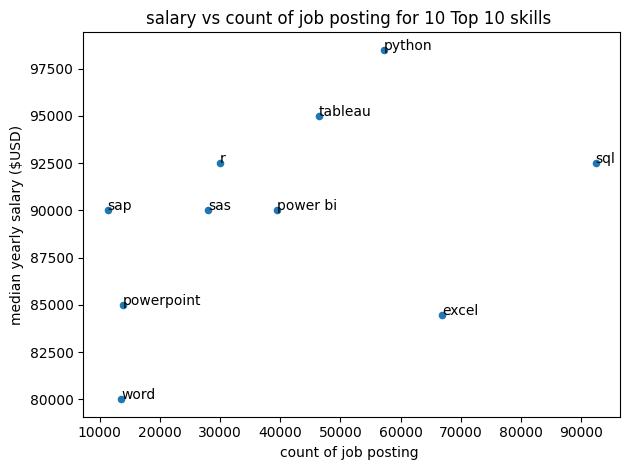

In [58]:
skill_status.plot(kind='scatter',x='skill_count',y='median_salary')
#this plot tell us how much paid every skill and how skill much demand for data analyst

plt.title('salary vs count of job posting for 10 Top 10 skills ') #now i know why use head(top) instead of head(10)
plt.xlabel('count of job posting ')
plt.ylabel('median yearly salary ($USD)')
plt.tight_layout()


#we need index and column name 
for i,text in enumerate(skill_status.index):
    plt.text(skill_status['skill_count'].iloc[i],skill_status['median_salary'].iloc[i],text)
    #iloc[i] = location ,row 

plt.show()

In [ ]:
️# skill_count=('job_skills', 'count') 
#new column name = 'skill_count'
#'job_skills' = which column to apply aggregate function
#'count' = which function to apply
#So it counts how many times each skill appears 
# and saves that result in a new column named 'skill_count'.

# to make everything comment :Select the lines → press  Ctrl + /

# Why .iloc Specifically:
# .iloc is used for integer-based indexing, which is necessary 
#  the loop variable i  is an integer (from enumerate(skill_status.index)).
# Without .iloc[i], you would need to use the actual index label (e.g., skill_status['skill_count'][text]), but since text is the skill name (from the index) 
# and you’re iterating over integer positions,iloc[i] is more straightforward and aligns with the loop structure.

# "i-th": refers  index i in a sequence
#skill_status['skill_count'].iloc[0] retrieves number in skill count column in skill status table
# skill_status[''median_salary''].iloc[1] retrieves number in median salary column in skill status table

SyntaxError: invalid character '️' (U+FE0F) (4202945696.py, line 1)